In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [29]:
mlp_baseline_results = pd.read_csv('simple_mlp_results.csv')
mlp_baseline_results.replace({'simple_mlp_initializer': 'MLP'}, inplace=True)

mlp_xi_reg_results = pd.read_csv('mlp_xi_reg_results.csv')
mlp_xi_reg_results.replace({'mlp_xi_reg_initializer': r'MLP+RPR$_{\xi}$'}, inplace=True)

mlp_results = pd.concat([mlp_baseline_results, mlp_xi_reg_results])

ftl_baseline_results = pd.read_csv('ftl_mlp_results.csv')
ftl_baseline_results.replace({'ftl_mlp_initializer': 'FTL'}, inplace=True)

ftl_xi_reg_results = pd.read_csv('ftl_mlp_xi_reg_results.csv')
ftl_xi_reg_results.replace({'ftl_mlp_xi_reg_initializer': r'FTL+RPR$_{\xi}$'}, inplace=True)

ftl_results = pd.concat([ftl_baseline_results, ftl_xi_reg_results])
results = pd.concat([mlp_results, ftl_results])

In [30]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [31]:
results.replace({'adult_dataset_reader': 'Adult', 'compas_dataset_reader': 'COMPAS', 'german_dataset_reader': 'German', 'bank_dataset_reader': 'Bank'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [32]:
display(results)

,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,solution
0,Adult,MLP,mcc_parity,0.392537,0.851299,0.585170,0.113127,0.192633,0.142532,{'dropout': 0.16228954240968418}
1,Adult,MLP,mcc_odds,0.473935,0.851520,0.585500,0.111565,0.198915,0.132052,{'dropout': 0.1482543145261793}
2,Adult,MLP,mcc_opportunity,0.460175,0.851410,0.585064,0.103235,0.191606,0.124889,{'dropout': 0.17861515209545933}
3,Adult,MLP,acc_parity,0.661796,0.844887,0.565373,0.082386,0.183090,0.084174,{'dropout': 0.15655371267306142}
4,Adult,MLP,acc_odds,0.766170,0.850857,0.577932,0.084687,0.180366,0.093891,{'dropout': 0.1698638434734938}
...,...,...,...,...,...,...,...,...,...,...
355,German,FTL+RPR$_{\xi}$,mcc_odds,0.185944,0.705000,0.288309,0.102366,0.139706,0.094841,"{'l2': 0.01, 'dropout': 0.10106500911682068, '..."
356,German,FTL+RPR$_{\xi}$,mcc_opportunity,0.348196,0.765000,0.404544,0.166332,0.112130,0.056348,"{'l2': 0.01, 'dropout': 0.055735168573605956, ..."
357,German,FTL+RPR$_{\xi}$,acc_parity,0.689560,0.750000,0.367562,0.071392,0.060440,0.042784,"{'l2': 0.01, 'dropout': 0.13197189864137626, '..."
358,German,FTL+RPR$_{\xi}$,acc_odds,0.657200,0.670000,0.089904,0.012800,0.017328,0.023625,"{'l2': 0.001, 'dropout': 0.13429596161992546, ..."


In [33]:
datasets = results['dataset'].unique().tolist()
datasets

['Adult', 'Bank', 'COMPAS', 'German']

In [34]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [35]:
fitness_rules_target_metrics = {
    'mcc_parity': {'performance': 'Mathew Correlation', 'fairness': 'Statistical Parity'},
    'mcc_opportunity': {'performance': 'Mathew Correlation', 'fairness': 'Equal Opportunity'},
    'mcc_odds': {'performance': 'Mathew Correlation', 'fairness': 'Equalized Odds'},
    'acc_parity': {'performance': 'Accuracy', 'fairness': 'Statistical Parity'},
    'acc_opportunity': {'performance': 'Accuracy', 'fairness': 'Equal Opportunity'},
    'acc_odds': {'performance': 'Accuracy', 'fairness': 'Equalized Odds'}
}

fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}
fitness_rules_abvr = {
    'mcc_parity': 'Max(MCC - Stat. Parity)',
    'mcc_opportunity': 'Max(MCC - Eq. Odds)',
    'mcc_odds': 'Max(MCC - Eq. Opp.)',
    'acc_parity': 'Max(Acc - Stat. Parity)',
    'acc_opportunity': 'Max(Acc - Eq. Odds)',
    'acc_odds': 'Max(Acc - Eq. Opp.)'
}
results['Performance'] = 0
results['Fairness'] = 0
results['Fitness Rule'] = ''
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule Abvr'] = fitness_rules_abvr[fitness_rule]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

/tmp/ipykernel_6351/2509401596.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.58517004 0.58512823 0.5840247  0.5836371  0.57625737 0.5769683
 0.58075151 0.57811729 0.57147862 0.55847176 0.56402881 0.58191431
 0.58343253 0.57740222 0.51579307 0.30958237 0.37962947 0.55899189
 0.53558872 0.2598879  0.57717035 0.50086739 0.33275221 0.37929293
 0.47729109 0.29196869 0.29037704 0.52303609 0.27480633 0.38668781
 0.50626951 0.29960979 0.4042848  0.52119218 0.2936422  0.33522388
 0.49730721 0.25112662 0.35119067 0.510052   0.26843855 0.36081008
 0.52157495 0.30114722 0.42995147 0.48267704 0.29056691 0.23139881
 0.54223416 0.23653437 0.27041017 0.52121263 0.25759348 0.23912165
 0.5223892  0.27406652 0.22303564 0.54094974 0.27699558 0.30939251
 0.51731345 0.30339828 0.37825089 0.52113734 0.26323857 0.33963196
 0.5538225  0.27850228 0.30234984 0.51877126 0.29494101 0.2648939
 0.52742877 0.24492927 0.13407928 0.535303

In [36]:
methods = ['MLP', r'MLP+RPR$_{\xi}$', 'FTL', r'FTL+RPR$_{\xi}$']

## Possible names
- Sensitive Correlation Regularization/Penalty
- Redlining Regularization/Penalty
- Senstive-$L_2$ Regularization

Let
- $X \in \mathbb{R}^{n\times d}$ represent a dataset with $n$ instances and $d$ features
- $X_i \in \mathbb{R}^n, \; 1 \leq i \leq d$ be the $i$-th feature of the dataset
- $A = X_i \in \mathbb{R}^n$ the sensitive feature (protected) for some $i$
- $W^{(1)} \in \mathbb{R}^{d \times h}$ the weight matrix for the first hidden layer, with $h$ being the number of neurons in this layer.
- $\lambda \in \mathbb{R}^{d}$ the vector of regularization strengths for each feature
- $\alpha$ a scalar that controls the overall strength of the regularization

### Regularization Term
The regularization term $R(\mathbf{W}^{(1)})$ applied to the weight matrix $\mathbf{W}^{(1)}$ of the first hidden layer is defined as:
$$R(\mathbf{W}^{(1)}) = \sum_{i=1}^d \lambda_i \sum_{j=1}^h (W^{(1)}_{ij})^2$$
Here, $\lambda_i = |correlation(A,X_i)|$ is the regularization strength for the $i$-th input feature using an arbitrary correlation coefficient (eg. Pearson r, Spearman r, Kendall tau, Chatterjee xi) within sensitive feature A, and $W^{(1)}_{ij}$ is the weight connecting the $i$-th input feature to the $j$-th neuron in the first hidden layer.

The total loss function $L$ for the MLP, incorporating sensitive-$L_2$ regularization, is:
$$L = L_0 + \alpha \; R(\mathbf{W}^{(1)})$$
where $L_0$ is the primary loss function of the network




/tmp/ipykernel_6351/2771253775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['method'] = pd.Categorical(subset['method'], categories=methods)
/tmp/ipykernel_6351/2771253775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['method'] = pd.Categorical(subset['method'], categories=methods)
/tmp/ipykernel_6351/2771253775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

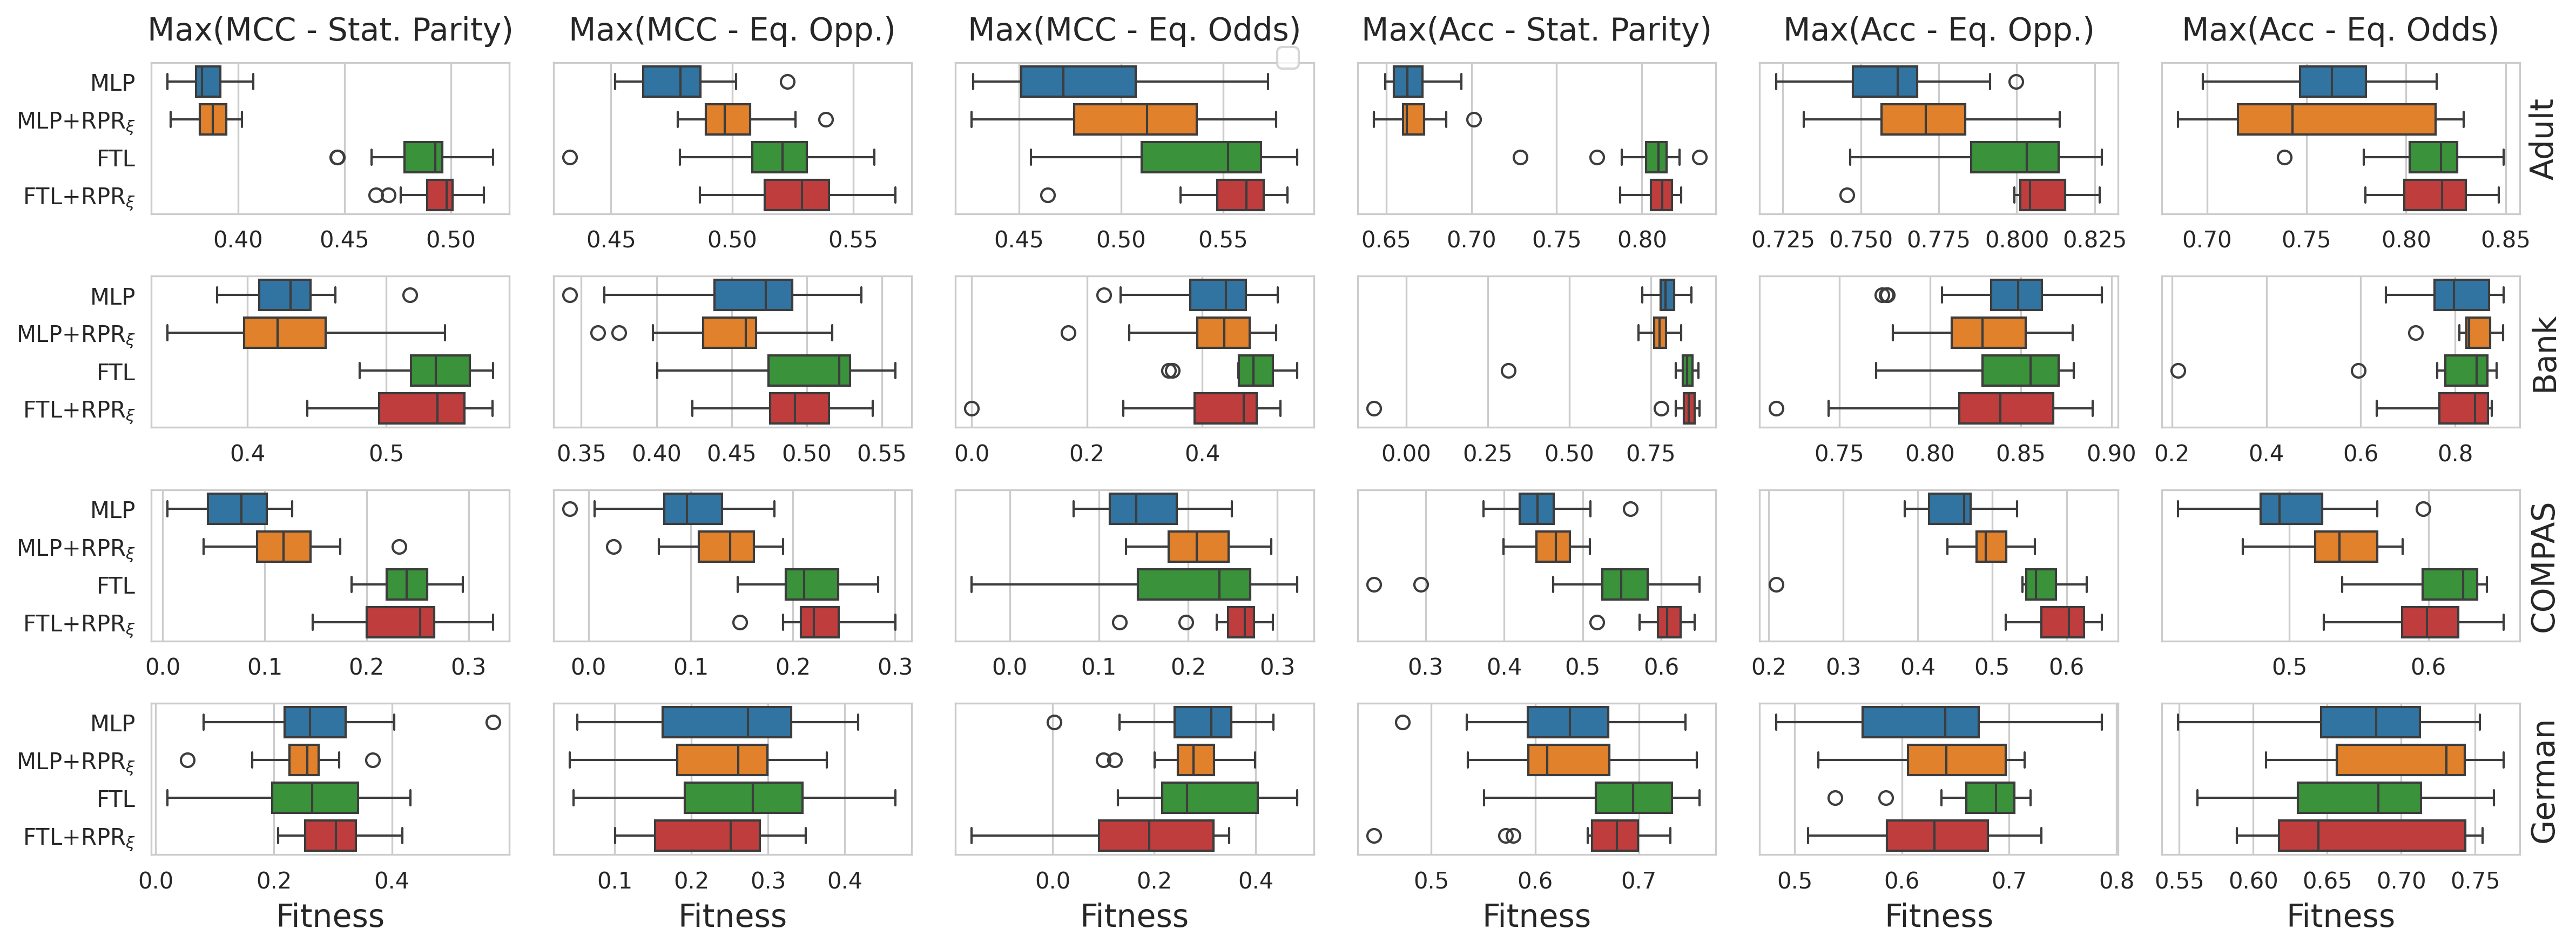

In [51]:
# 4 datasets x 6 fitness rules
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 6), sharex=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Iterate through datasets (rows) and fitness rules (columns)
for i, dataset in enumerate(datasets):
    for j, fitness_rule in enumerate(fitness_rules):
        ax = axes[i, j]
        
        # Filter data for current dataset and fitness rule
        subset = results[(results.dataset == dataset) & (results.fitness_rule == fitness_rule)]
        subset['method'] = pd.Categorical(subset['method'], categories=methods)
        subset = subset.sort_values(by='method')
        
        # Create boxplot
        boxplot = sns.boxplot(data=subset, hue='method', x='fitness', y='method', ax=ax)
        
        # Set titles and labels
        if i == 0:  # First row - add fitness rule titles
            ax.set_title(fitness_rules_abvr[fitness_rule], fontsize=14, pad=10)
        else:
            ax.set_title('')
            
        ax.yaxis.set_label_position("right")
        #ax.yaxis.label.set_rotation(270)
        if j == len(fitness_rules) - 1:  # Last column - add dataset labels
            ax.set_ylabel(dataset, fontsize=14)
        else:
            ax.set_ylabel('')
            
        # Remove x-axis labels except for bottom row
        if i < len(datasets) - 1:
            ax.set_xlabel('')
        else:
            ax.set_xlabel('Fitness', fontsize=14)
            
        # Remove y-axis tick labels except for first column
        if j > 0:
            ax.set_yticklabels([])
            
# Add a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the legend
plt.savefig('plots/boxplot_grid_rpr.pdf', bbox_inches='tight')
plt.savefig('plots/boxplot_grid_rpr.png', bbox_inches='tight')
plt.show()


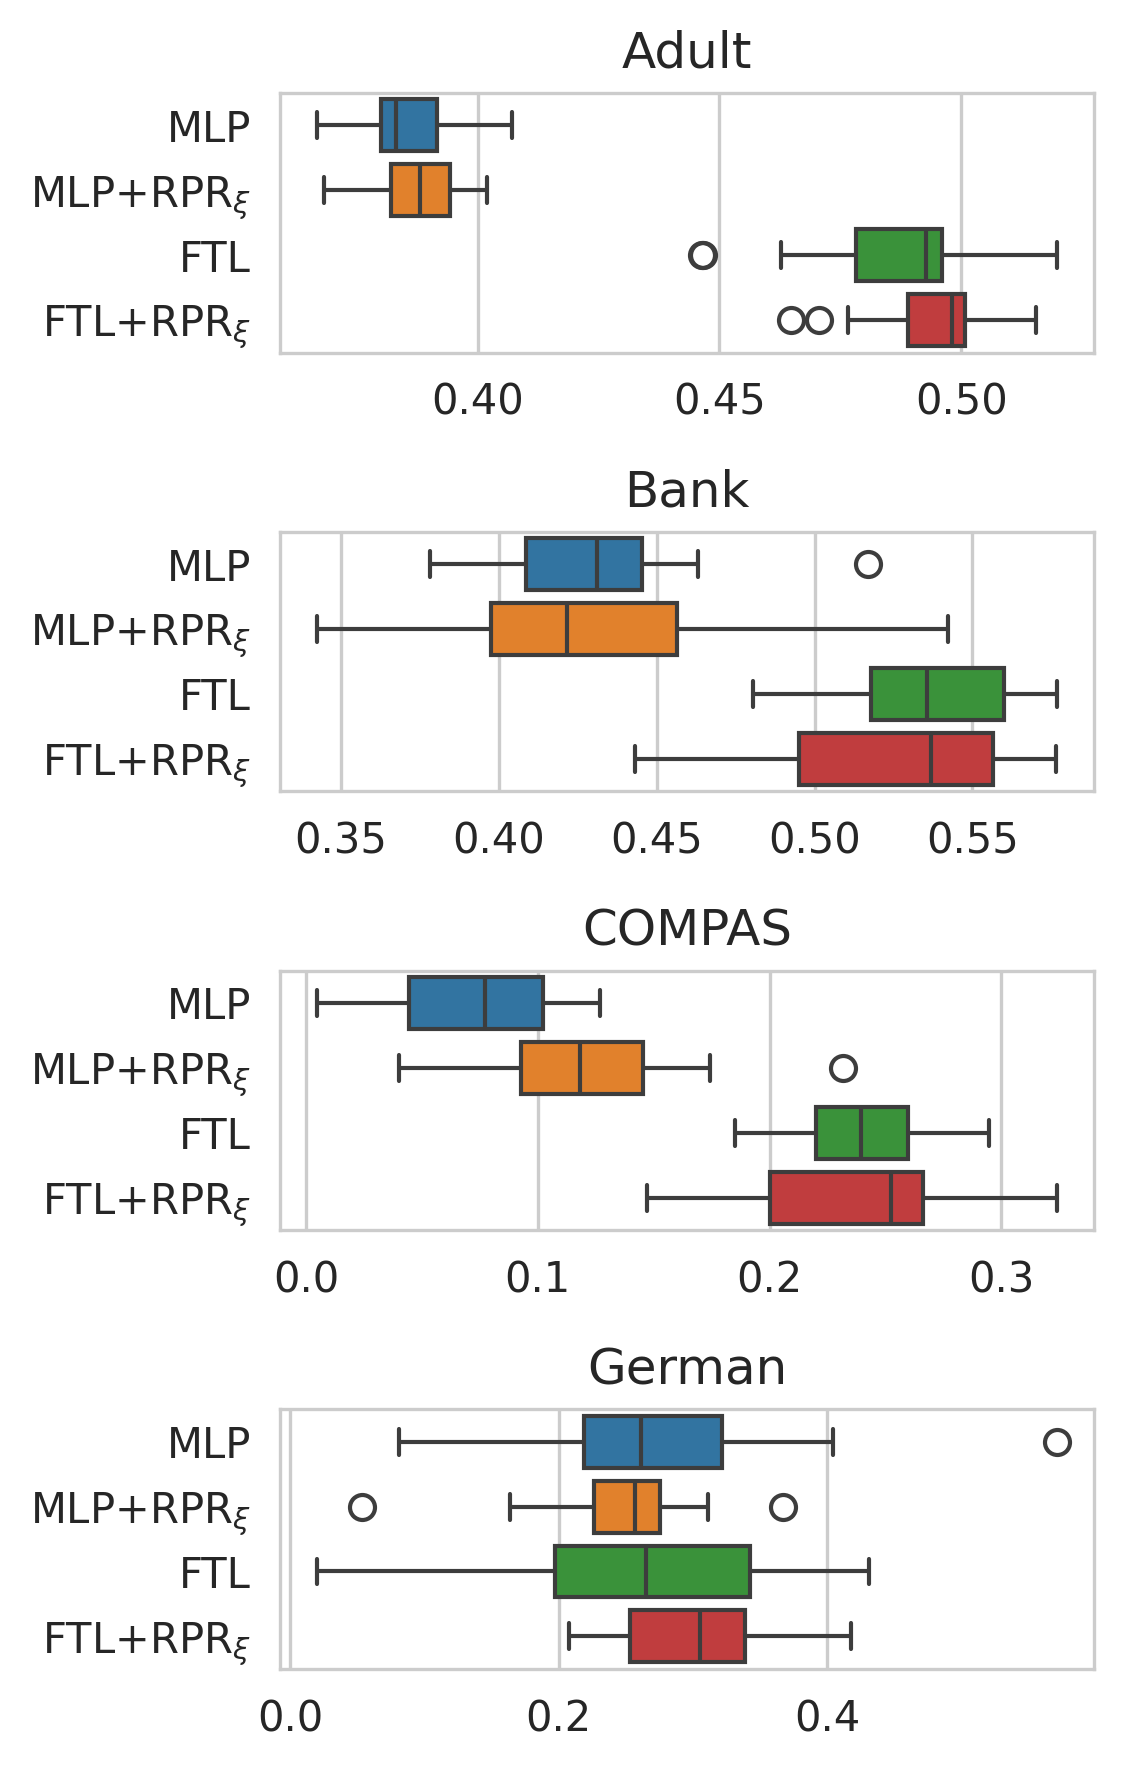

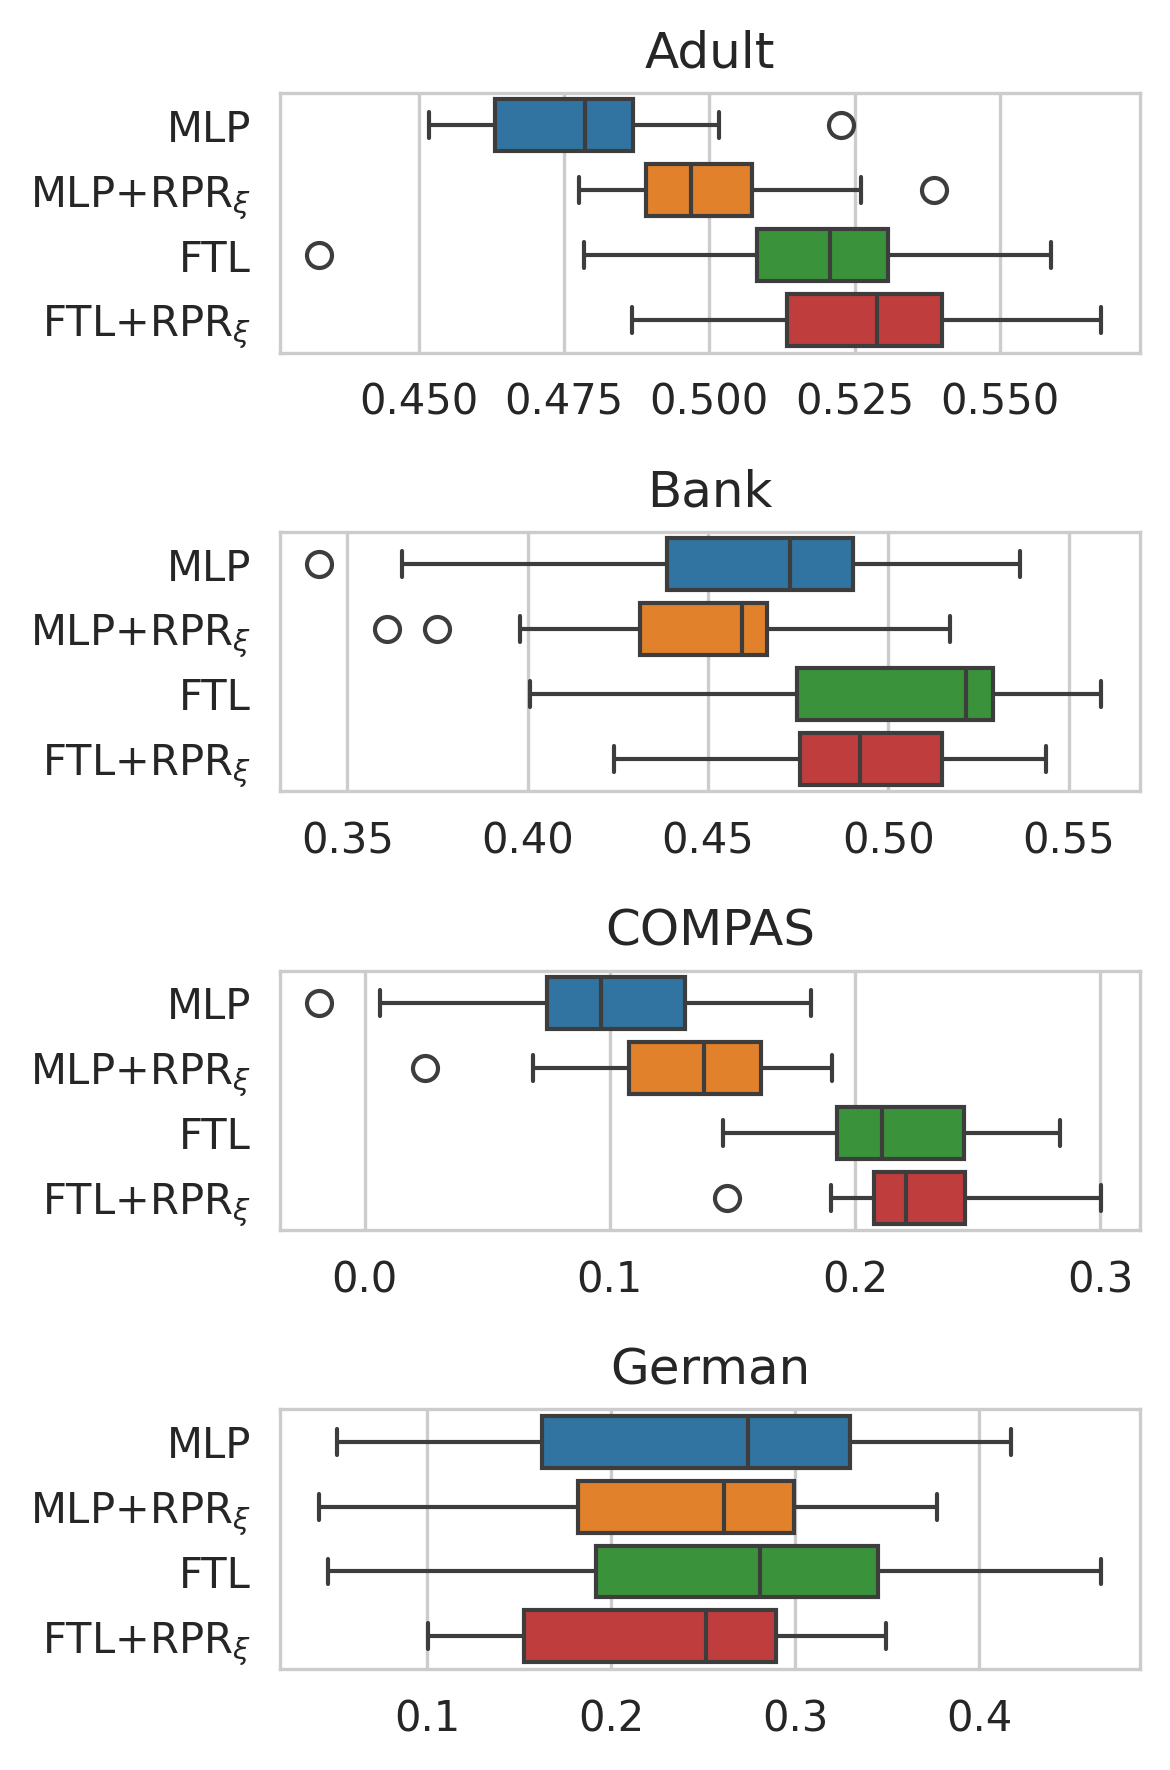

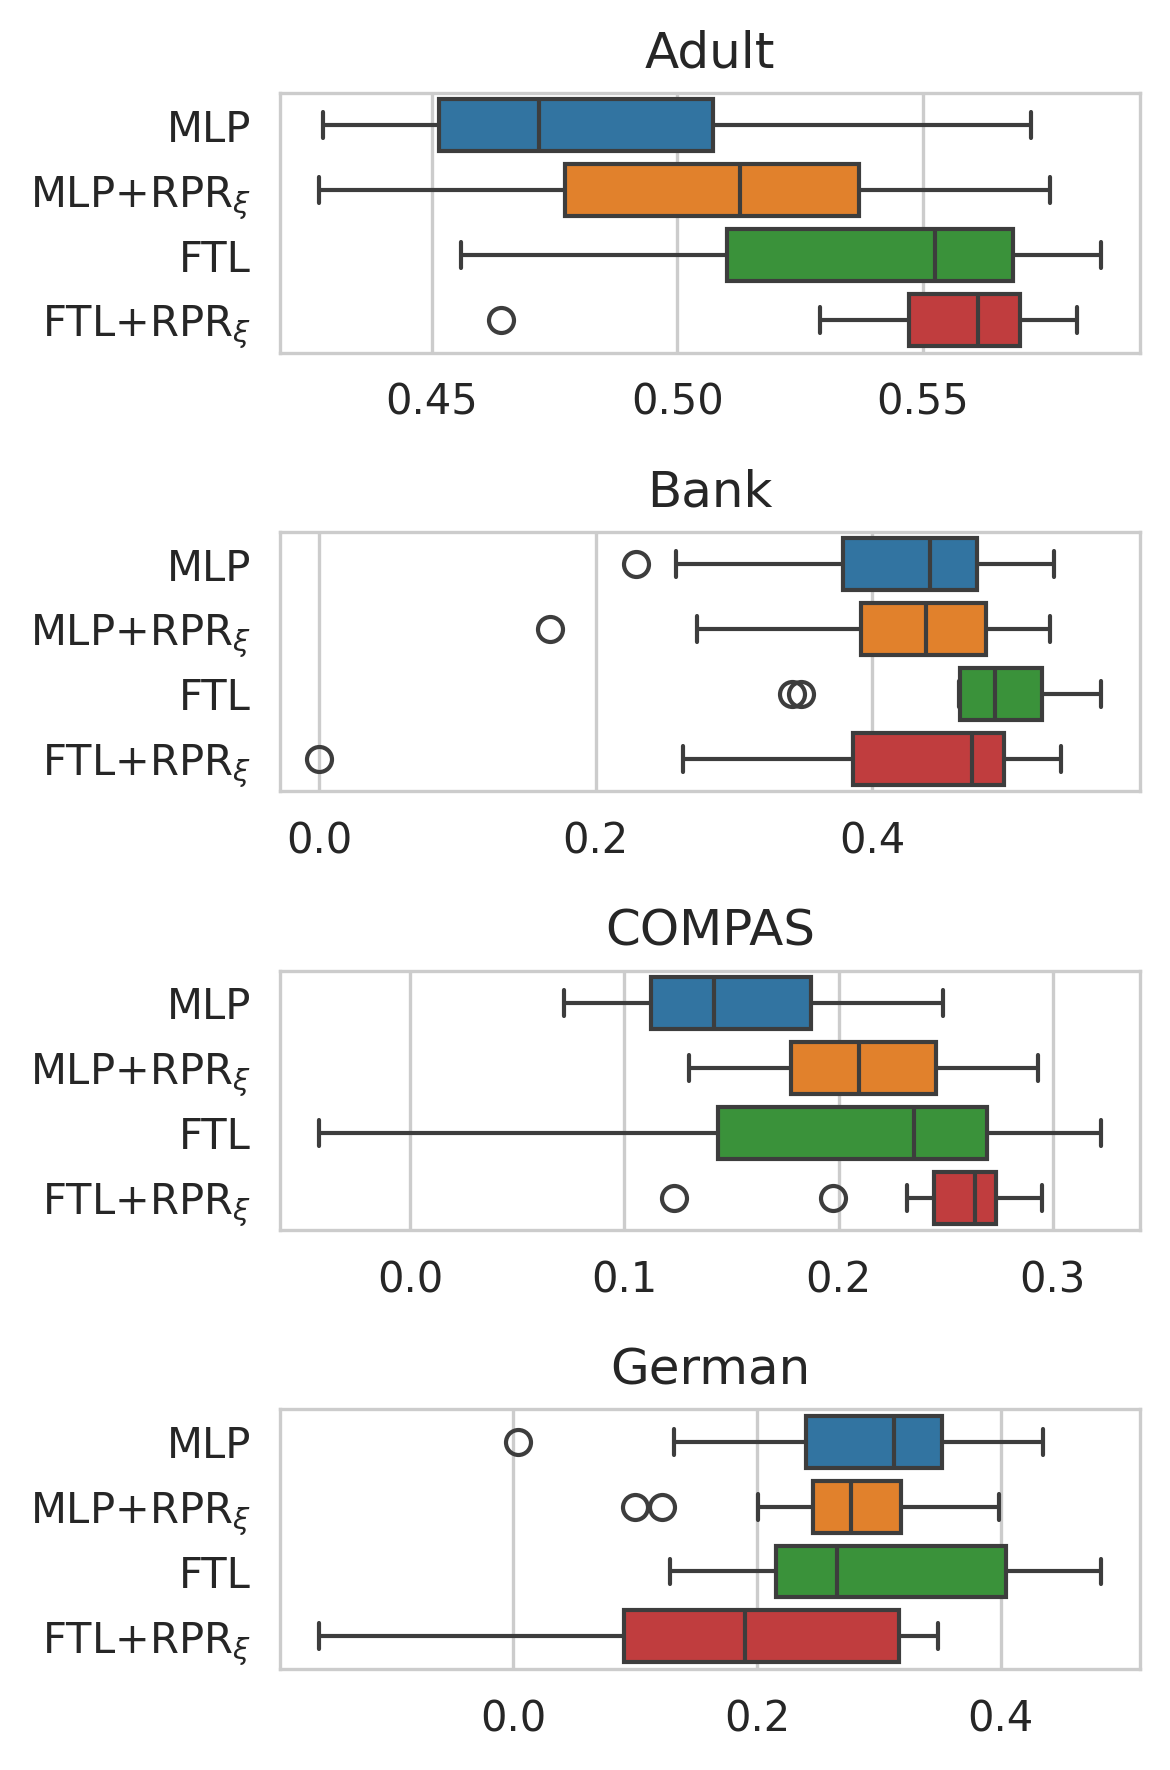

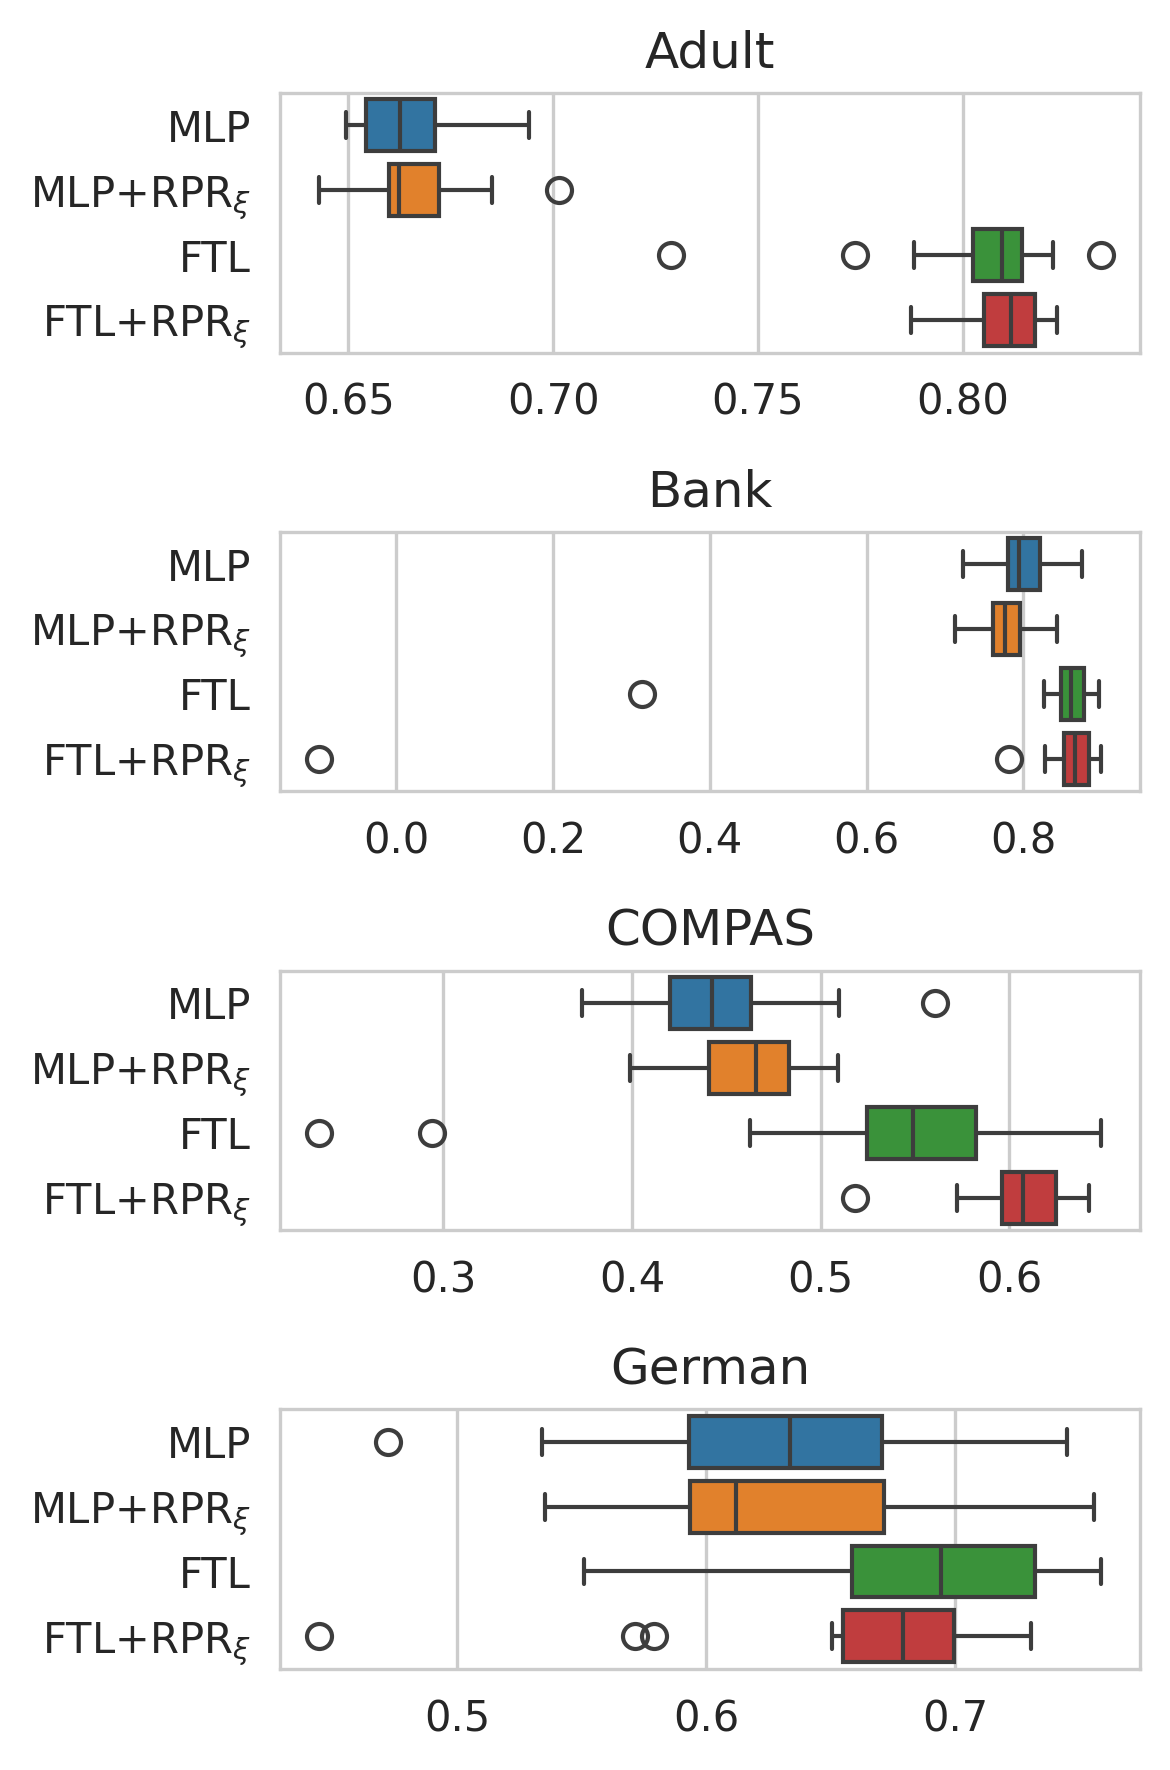

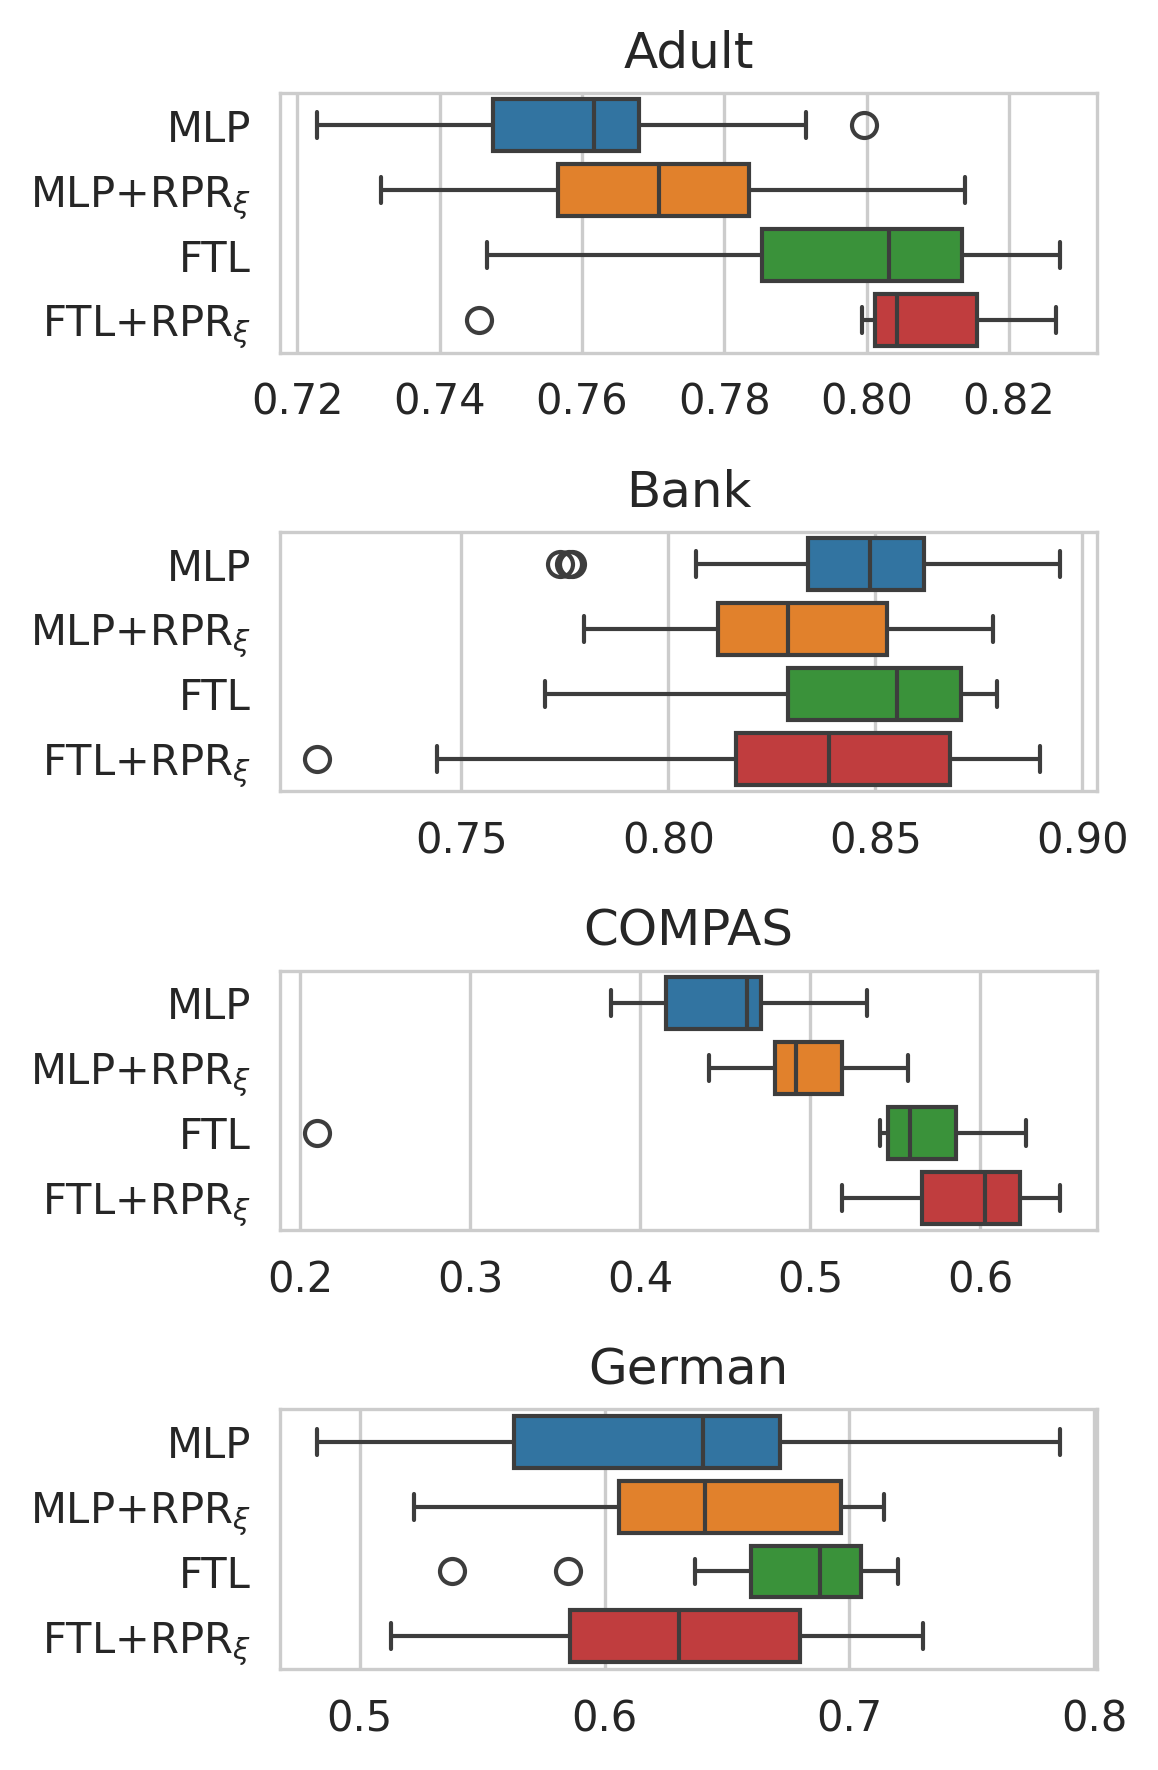

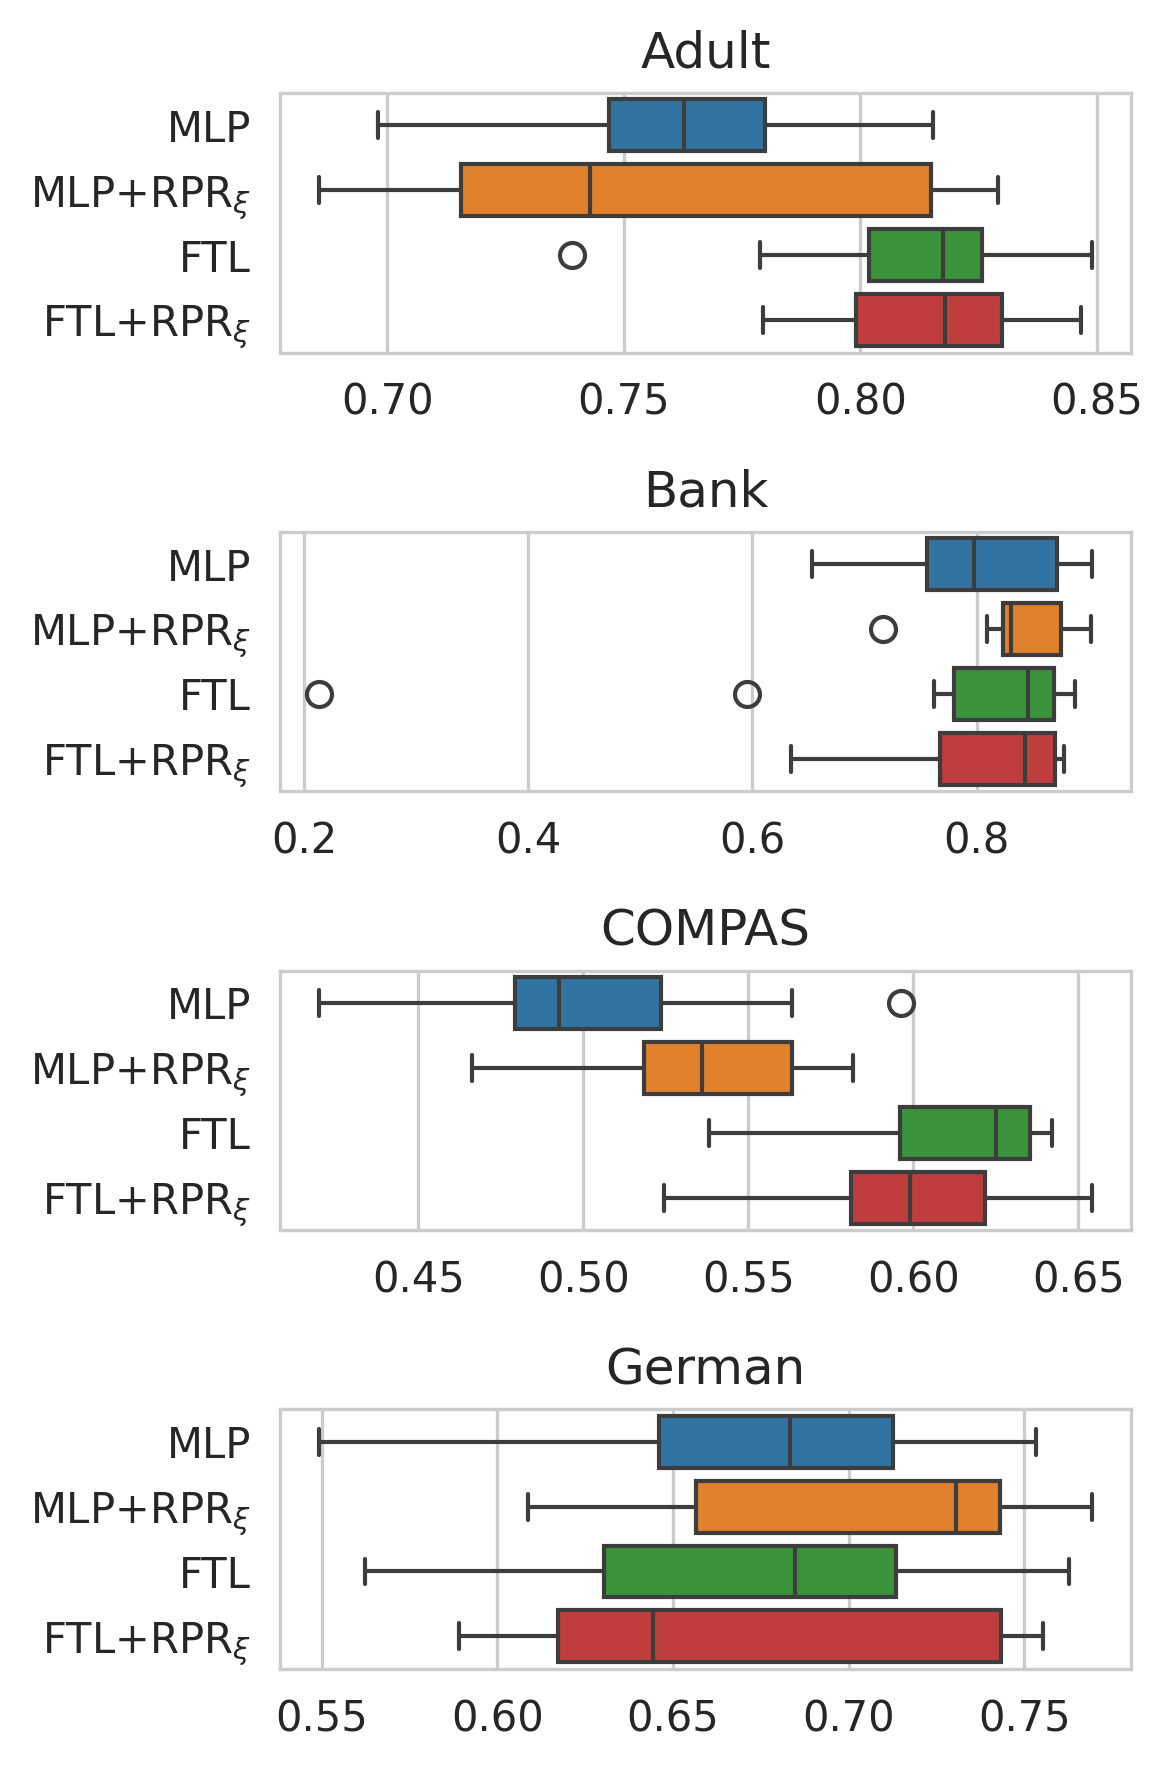

In [38]:
for fitness_rule in fitness_rules:
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4, 6))
    fig.subplots_adjust(hspace=0.7)

    for dataset, ax in zip(sorted(datasets), axes.flatten()):
        by_fitness_rule = results[results.fitness_rule == fitness_rule]
        by_fitness_rule = by_fitness_rule[by_fitness_rule.dataset == dataset]
        by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
        by_fitness_rule = by_fitness_rule.sort_values(by='method')

        boxplot = sns.boxplot(data=by_fitness_rule, hue='method',
                    x='fitness', y='method', ax=ax)

        #ax.set_ylabel(dataset)
        #ax.yaxis.set_label_position("right")
        ax.set_title(dataset)
        ax.set_ylabel('')
        ax.set_xlabel('')

        ## Remove y-ticks from the second column
        if ax.get_subplotspec().colspan.start != 0:
            ax.set_yticks([])


        ## Remove x-ticks and labels from all but the last row
        if ax.get_subplotspec().rowspan.start != 3:
            ax.set_xlabel('')


    # Set x-labels for the last row
    #axes[-1].set_xlabel('Fitness')

    plt.tight_layout()
    plt.savefig('plots/boxplot_%s_rpr.pdf' % fitness_rule)
    plt.savefig('plots/boxplot_%s_rpr.png' % fitness_rule)
    plt.show()